# Boosting Algorithm

## Librerias a utilizar

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import joblib

## Paso 1. Lectura del conjunto de datos procesado

In [4]:
X=pd.read_csv('../../Random_Forest/data/processed/X.csv')
y=pd.read_csv('../../Random_Forest/data/processed/y.csv')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,0,34.100000,0.337000,38
535,4,132,0,32.900000,0.302000,23
695,7,142,480,30.400000,0.128000,43
557,8,110,0,27.800000,0.237000,58
836,4,122,0,32.020995,0.256373,35


## Paso 2: Inicialización y entrenamiento del modelo

In [106]:
model = XGBClassifier(random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## Paso 3: Predicción del modelo

In [108]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [109]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
predicciones_exactas = accuracy_score(y_test, y_pred, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.795
El número de predicciones exactas es:  159.0


### Validación cruzada del modelo

In [110]:
# Realiza la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Imprime los resultados
print("Scores:", scores)
print("Mean score:", round(scores.mean(),4))
print("Standard deviation:", round(scores.std(),4))

Scores: [0.775  0.7    0.825  0.7625 0.7625 0.8625 0.7625 0.775  0.8125 0.85  ]
Mean score: 0.7887
Standard deviation: 0.0463


## Paso 3: Optimización del Modelo

### RandomizedSearchCV

In [10]:
params = {"n_estimators": np.arange(50,450,50), "max_depth": [3,5,10,15], "max_leaves":[5,10,15,20], 
    "learning_rate": np.arange(0.01,0.2,0.02),
    "subsample": np.arange(0.1,1,0.1),
    "reg_alpha": np.arange(0.1,1,0.1),
    "reg_lambda": np.arange(0.1,1,0.1),
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
    "grow_policy":['lossguide','depthwise'],
    "random_state":[42]
}

In [11]:
model_rs = RandomizedSearchCV(XGBClassifier(), param_distributions=params, n_iter=20, scoring='accuracy', n_jobs=1, cv=10, verbose=1)
model_rs.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                                        'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19]),
                                        'max_depth': [3, 5, 10, 15],
                                        'max_leaves': [5, 10, 15, 20],
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400]),
                                        'random_state': [42],
                                        'reg_alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'reg_lambda': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [12]:
print("Mejor puntuación:", model_rs.best_score_)
print("Mejores hiperparámetros:", model_rs.best_params_)

Mejor puntuación: 0.8087499999999999
Mejores hiperparámetros: {'subsample': 0.8, 'reg_lambda': 0.5, 'reg_alpha': 0.7000000000000001, 'random_state': 42, 'n_estimators': 100, 'max_leaves': 10, 'max_depth': 10, 'learning_rate': 0.16999999999999998, 'grow_policy': 'lossguide', 'gamma': 0.2, 'colsample_bytree': 0.7}


In [13]:
model_rs_final=XGBClassifier(subsample= 0.8, reg_lambda=0.5,reg_alpha= 0.7,random_state=42,n_estimators= 100,
                             max_leaves=10, max_depth= 10, learning_rate= 0.17, grow_policy='lossguide',gamma=0.2, colsample_bytree=0.7)
model_rs_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [14]:
y_pred_rs = model_rs_final.predict(X_test)
y_pred_rs

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1])

In [15]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_rs, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.79
El número de predicciones exactas es:  158.0


### GridSearchCV

In [16]:
params_grid = {"n_estimators": (50,100,200), "max_depth": [10,15], "max_leaves":[5,10], 
    "learning_rate": (0.01,0.1),
    "subsample": [0.2,0.4],
    "reg_alpha": [0.1,0.2],
    "reg_lambda":[0.01,0.1],
    "gamma": [0.0, 0.1],
    "colsample_bytree": [0.4, 0.5],
    "grow_policy":['lossguide'],
    "random_state":[42]
    }


In [17]:
# Crear un objeto GridSearchCV
model_gs = GridSearchCV(XGBClassifier(), param_grid=params_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Entrenar el modelo con los datos de entrenamiento
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.4, 0.5], 'gamma': [0.0, 0.1],
                         'grow_policy': ['lossguide'],
                         'learning_rate': (0.01, 0.1), 'max_depth': [10, 15],
                         'max_leaves': [5, 10], 'n_estimators': (50, 100, 200),
                         'random_state': [42], 'reg_alpha': [0.1, 0.2],
                         'reg_lambda': [0.01, 0.1], 'subsample': [0.2, 0.4]},
             scoring='accuracy', verbose=1)

In [19]:
print("Mejor puntuación:", model_gs.best_score_)
print("Mejores hiperparámetros:", model_gs.best_params_)

Mejor puntuación: 0.80625
Mejores hiperparámetros: {'colsample_bytree': 0.4, 'gamma': 0.0, 'grow_policy': 'lossguide', 'learning_rate': 0.1, 'max_depth': 10, 'max_leaves': 10, 'n_estimators': 200, 'random_state': 42, 'reg_alpha': 0.2, 'reg_lambda': 0.01, 'subsample': 0.4}


In [20]:
# Crear un objeto GridSearchCV
model_gs_final = XGBClassifier(colsample_bytree= 0.4, gamma=0.0, grow_policy='lossguide',learning_rate= 0.1, 
                              max_depth=10, max_leaves= 10, n_estimators=200, reg_alpha=0.2, reg_lambda= 0.01, subsample= 0.4,
                             random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model_gs_final.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy='lossguide', importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [21]:
y_pred_gs = model_gs_final.predict(X_test)
y_pred_gs


array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1])

In [22]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_gs, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 


Accuracy Score: 0.76
El número de predicciones exactas es:  152.0


### Resultados Optimización

- Las técnicas de RandomizedSearchCV y GridSearchCV, no mejoraron significativamente el modelo que ejecute inicialmente con el XGBClassifier usando los parametros por defecto. Por lo cual, los siguientes analisis estarán basados en el modelo denominado **model**.

### Parámetros de desempeño del modelo

#### Curva Roc

In [111]:
y_pred_proba=model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

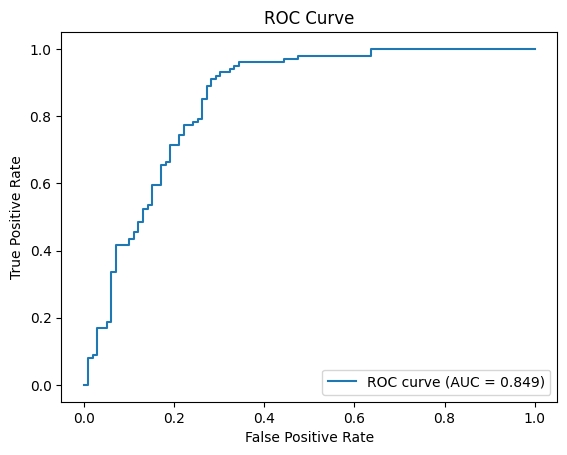

In [112]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Matriz de Confusión

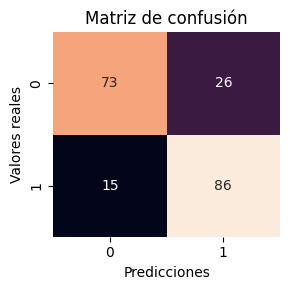

In [113]:
cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')

plt.tight_layout()

plt.show()

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        99
           1       0.77      0.85      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



#### Otras métricas de rendimiento del modelo

Gap de Presicion: 0.2
Coeficiente de sobreajuste: 0.205
Ratio de Sobreajuste: 0.26


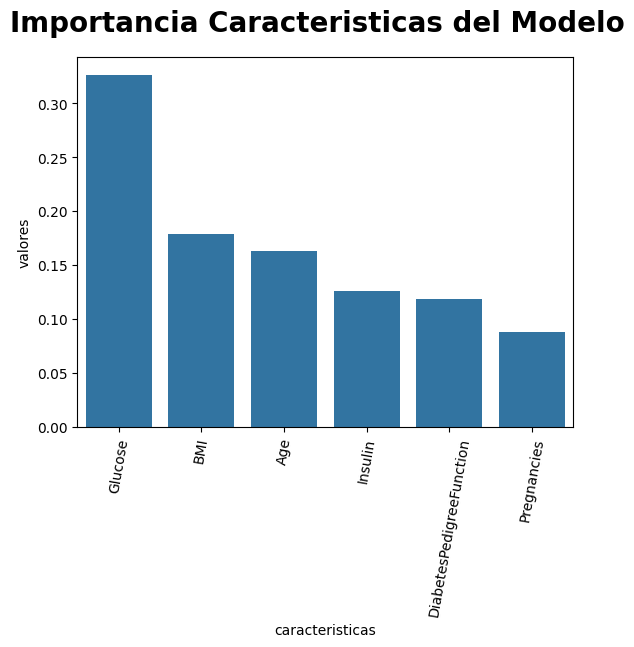

            caracteristicas   valores
1                   Glucose  0.326494
3                       BMI  0.178713
5                       Age  0.163216
2                   Insulin  0.125568
4  DiabetesPedigreeFunction  0.118071
0               Pregnancies  0.087938


In [115]:
# Predicciones en entrenamiento
y_pred_train = model.predict(X_train)

# Precisión en entrenamiento
precision_train = accuracy_score(y_train, y_pred_train)

# Predicciones en evaluación
y_pred_test = model.predict(X_test)

# Precisión en evaluación
precision_test = accuracy_score(y_test, y_pred_test)

# Gap de precisión
gap_precision = precision_train - precision_test
print('Gap de Presicion:',round(gap_precision,2))

#Coeficiente de sobreajuste
#Coeficiente de sobreajuste = (Precisión en entrenamiento - Precisión en evaluación) / Precisión en entrenamiento
#Un coeficiente cercano a 1 indica sobreajuste severo.

coeficiente_sobreajuste = gap_precision / precision_train
print('Coeficiente de sobreajuste:',round(coeficiente_sobreajuste,3))

# Ratio de sobreajuste
ratio_sobreajuste = (precision_train / precision_test) - 1
print('Ratio de Sobreajuste:',round(ratio_sobreajuste,2))


# Importancia de las características
imp_car = model.feature_importances_
df = (pd.DataFrame({"caracteristicas": X_train.columns,
                        "valores": imp_car})
          .sort_values("valores", ascending=False))
sns.barplot(x = 'caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Importancia Caracteristicas del Modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);
plt.show()
print(df)


#### Curva de Aprendizaje

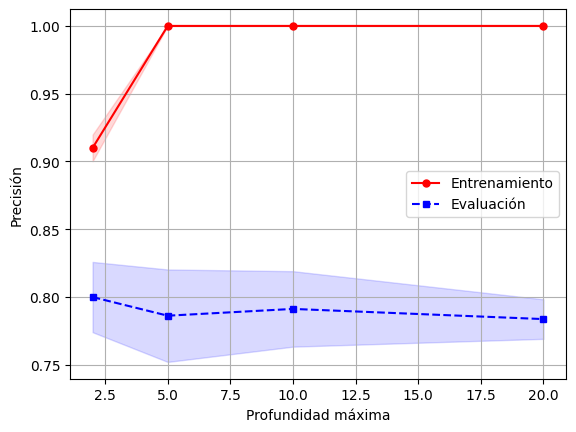

In [116]:
from sklearn.model_selection import validation_curve
# Definimos la lista de profundidades máximas para el árbol de decisión
max_deep_list = [2, 5, 10, 20]

# Calculamos la curva de aprendizaje
train_prec, eval_prec = validation_curve(estimator=model, X=X_train, 
                                         y=y_train, param_name='max_depth', 
                                         param_range=max_deep_list, cv=5)

# Calculamos la media y desviación estándar de la precisión para cada profundidad
train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

# Graficamos la curva de aprendizaje
plt.plot(max_deep_list, train_mean, color='r', marker='o', markersize=5, 
         label='Entrenamiento')
plt.fill_between(max_deep_list, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_deep_list, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Evaluación')
plt.fill_between(max_deep_list, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Profundidad máxima')
plt.ylabel('Precisión')
plt.show()

### Guardar Modelo

In [117]:
joblib.dump(model, '../../Boosting_Algorithm/models/XGBoostingf_model.joblib')

['../../Boosting_Algorithm/models/XGBoostingf_model.joblib']

### Conclusiones

- A pesar de haber obtenido un accuracy para el Random Forest y el Boosting iguales a 0.795, la calidad del Modelo XGBoosting (XGBClassifier) es menor.

- La calidad puede verse en las métricas relacionadas a la precisión y el sobreajuste. El Modelo XGBoosting tiene un Gap de Precisión de 20%, en relación al 6% que presentó el Random Forest. El coeficiente de sobreajuste para el XGBoosting fue de 0.205 mientrás que para el Random Forest fue de 0.074. 

- El costo computacional del Boosting es mucho mayor por la complejidad de los parámetros, es posible que haciendo una hiperparametrización más compleja, se supuere el modelo Random Forest. 

- En la curva de aprendizaje para el modelo XGBoosting, se observa como la curva de entrenamiento se ajusta abruptamente a los valores de entrenamiento (sobreajuste) y la curva de evaluación pierde propiedades por encima de 10, cayendo su precisión. 

- De los tres modelos estudiados: Decsion Tree, Random Forest y el XGBoosting. El modelo Random Forest generó las mejores métricas de desempeño.